# DC Movie Profit Prediction - Machine Learning

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
dc_films = pd.read_csv('Resources/DCEU_Profits.csv', index_col='Movie')
dc_films.head()


,Global Opening,Worldwide Gross,Domestic Gross,International Gross,Superman,Batman,Wonder Woman,Deadshot,Harley Quinn,Aquaman,Flash,Cyborg,Shazam,Joker,Lex Luthor,Number of Theaters,Number of Weeks,Budget
Movie,,,,,,,,,,,,,,,,,,
Man of Steel,226478579,668045518,291045518,377000000,1,0,0,0,0,0,0,0,0,0,0,4207,28,225000000
Batman v Superman: Dawn of Justice,356076879,873634919,330360194,543274725,1,1,1,0,0,1,1,1,0,0,1,4256,40,250000000
Suicide Squad,244258106,746846894,325100054,421746840,0,1,0,1,1,0,0,0,0,1,0,4255,22,175000000
Wonder Woman,230260677,821847012,412563408,409283604,0,1,1,0,0,0,0,0,0,0,0,4165,31,149000000
Justice League,734141594,657924295,229024295,428900000,1,1,1,0,0,1,1,1,0,0,1,4051,58,300000000


In [3]:
dc_films.corr()



,Global Opening,Worldwide Gross,Domestic Gross,International Gross,Superman,Batman,Wonder Woman,Deadshot,Harley Quinn,Aquaman,Flash,Cyborg,Shazam,Joker,Lex Luthor,Number of Theaters,Number of Weeks,Budget
Global Opening,1.000000,0.445852,0.378223,0.446614,0.498758,0.636717,0.419473,-0.017228,-0.285135,0.705982,0.806435,0.806435,-0.228438,-0.017228,0.558917,0.278601,0.497026,0.784500
Worldwide Gross,0.445852,1.000000,0.904823,0.968839,0.039289,0.428633,0.006058,0.136945,-0.267289,0.611242,0.239997,0.239997,-0.301581,0.136945,0.010604,0.501849,0.133814,0.320615
Domestic Gross,0.378223,0.904823,1.000000,0.771163,0.029185,0.602369,0.080992,0.240587,-0.175263,0.321659,0.160575,0.160575,-0.306085,0.240587,-0.062443,0.560063,-0.161675,0.263157
International Gross,0.446614,0.968839,0.771163,1.000000,0.041768,0.290478,-0.038058,0.064804,-0.297695,0.726810,0.265432,0.265432,-0.272865,0.064804,0.052179,0.424561,0.294129,0.326298
Superman,0.498758,0.039289,0.029185,0.041768,1.000000,0.100000,0.100000,-0.316228,-0.478091,0.316228,0.597614,0.597614,0.395285,-0.316228,0.790569,0.310803,0.176176,0.493761
Batman,0.636717,0.428633,0.602369,0.290478,0.100000,1.000000,0.550000,0.395285,0.059761,0.316228,0.597614,0.597614,-0.316228,0.395285,0.316228,0.277740,-0.081481,0.490345
Wonder Woman,0.419473,0.006058,0.080992,-0.038058,0.100000,0.550000,1.000000,-0.316228,-0.478091,0.316228,0.597614,0.597614,-0.316228,-0.316228,0.316228,-0.446453,0.116716,0.575738
Deadshot,-0.017228,0.136945,0.240587,0.064804,-0.316228,0.395285,-0.316228,1.000000,0.661438,-0.250000,-0.188982,-0.188982,-0.125000,1.000000,-0.250000,0.150962,-0.525778,-0.041106
Harley Quinn,-0.285135,-0.267289,-0.175263,-0.297695,-0.478091,0.059761,-0.478091,0.661438,1.000000,-0.377964,-0.285714,-0.285714,-0.188982,0.661438,-0.377964,0.220159,-0.202674,-0.431618
Aquaman,0.705982,0.611242,0.321659,0.726810,0.316228,0.316228,0.316228,-0.250000,-0.377964,1.000000,0.755929,0.755929,-0.250000,-0.250000,0.500000,0.199242,0.724251,0.583878


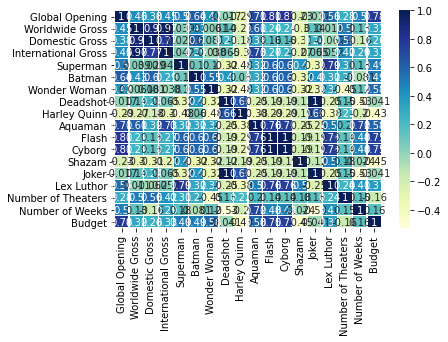

In [4]:
sns.heatmap(dc_films.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2)

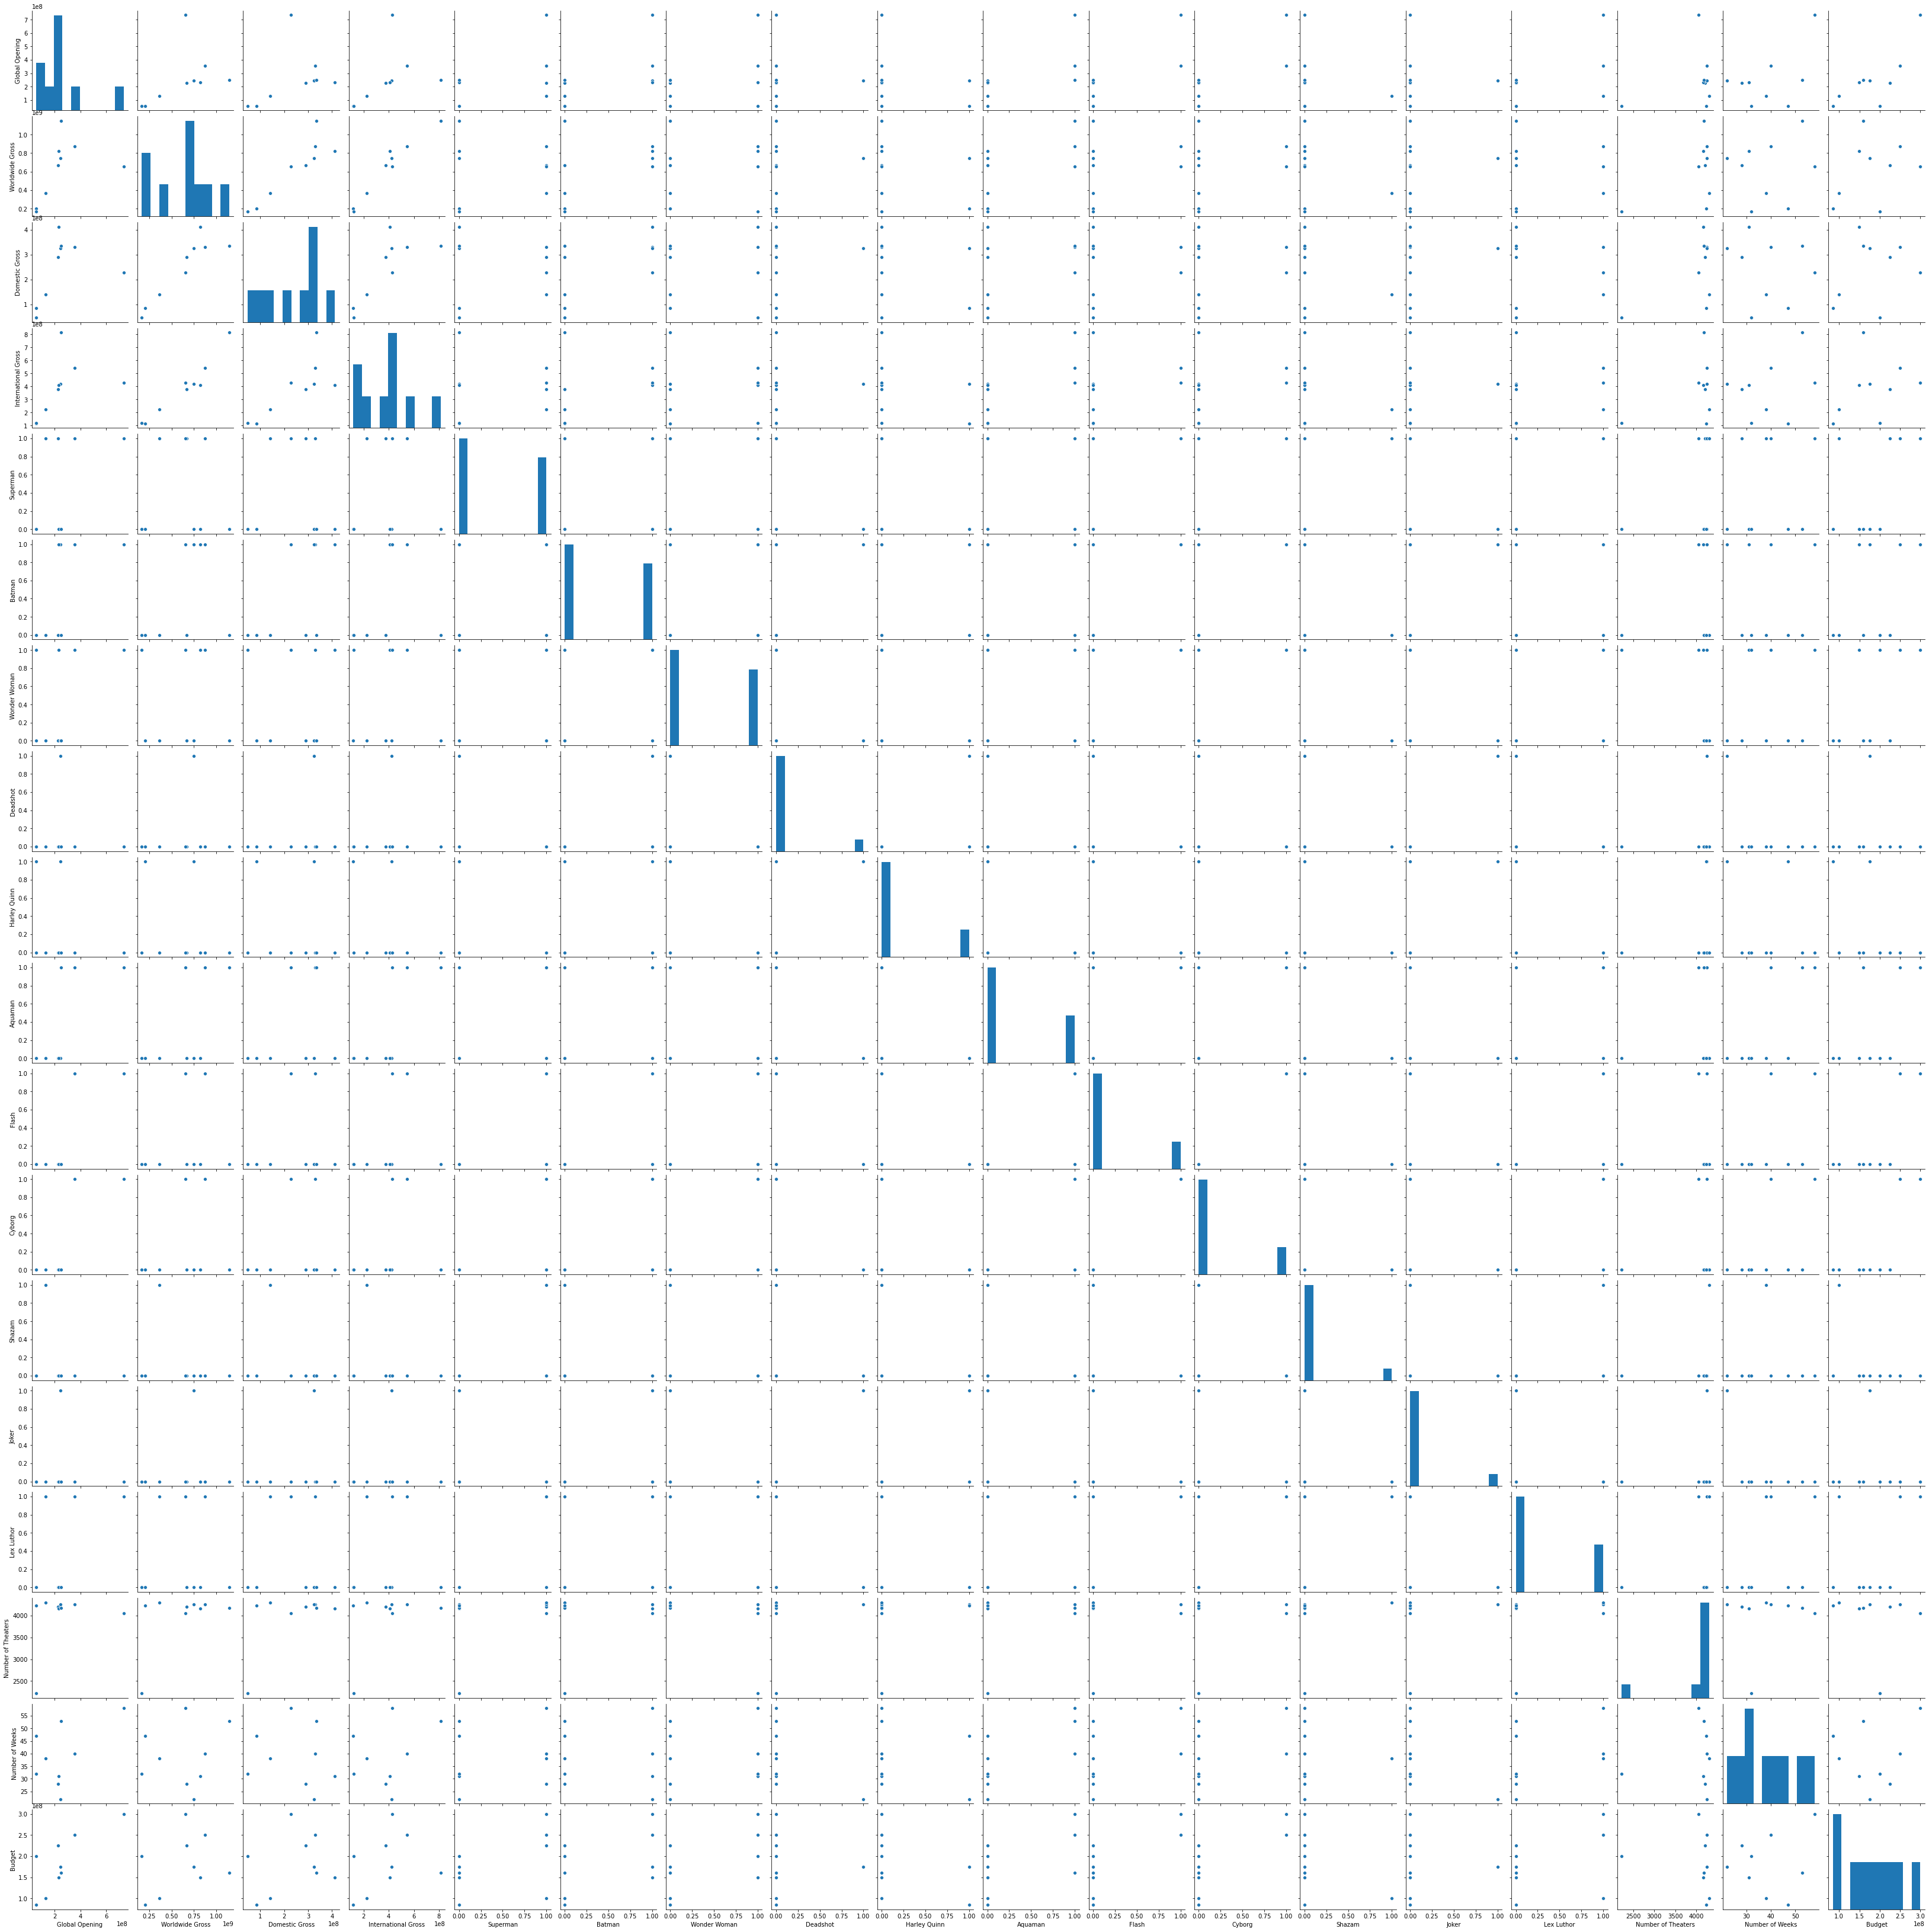

In [5]:
sns.pairplot(dc_films)

In [6]:
train_data = dc_films.sample(frac=0.8, random_state=42)
train_data.index
test_data = dc_films.drop(train_data.index)

In [7]:
train_data.index

Index(['Birds of Prey', 'Batman v Superman: Dawn of Justice', 'Aquaman',
       'Man of Steel', 'Wonder Woman 1984', 'Suicide Squad', 'Justice League'],
      dtype='object', name='Movie')

In [8]:
test_data.index

Index(['Wonder Woman', 'Shazam!'], dtype='object', name='Movie')

In [14]:
dc_vars = train_data[['Budget', 'Number of Theaters', 'Number of Weeks']]
dc_vars

,Budget,Number of Theaters,Number of Weeks
Movie,,,
Birds of Prey,84500000,4236,47
Batman v Superman: Dawn of Justice,250000000,4256,40
Aquaman,160000000,4184,53
Man of Steel,225000000,4207,28
Wonder Woman 1984,200000000,2218,32
Suicide Squad,175000000,4255,22
Justice League,300000000,4051,58


In [17]:
from sklearn.linear_model import LinearRegression
split_dceu_model = LinearRegression()
split_dceu_model.fit(X=dc_vars, y=train_data['Worldwide Gross'])

LinearRegression()

In [18]:
print('Intercept: ', split_dceu_model.intercept_)
print(' ')
print('Co-efficients: ', split_dceu_model.coef_)
print(' ')

Intercept:  -812018230.422384
 
Co-efficients:  [1.61383239e+00 2.78546082e+05 9.38771030e+05]
 


In [19]:
test_df = test_data[['Budget', 'Number of Theaters', 'Number of Weeks']]
test_df

,Budget,Number of Theaters,Number of Weeks
Movie,,,
Wonder Woman,149000000,4165,31
Shazam!,100000000,4306,38


In [21]:
predictions = split_dceu_model.predict(X=test_df)
print(predictions)

[6.17689127e+08 5.84457735e+08]


In [22]:
for i in predictions:
 print('$' + format(i, ',.2f'))

$617,689,127.41
$584,457,735.17


In [31]:
# Check R-squared
split_dceu_model.score(X=dc_vars, y=train_data['Worldwide Gross'])

0.44549511769861494

In [26]:
#test_data['Projected Gross'] = predictions
test_data.drop('Predicted Revenue', axis=1)

,Global Opening,Worldwide Gross,Domestic Gross,International Gross,Superman,Batman,Wonder Woman,Deadshot,Harley Quinn,Aquaman,Flash,Cyborg,Shazam,Joker,Lex Luthor,Number of Theaters,Number of Weeks,Budget,Projected Gross
Movie,,,,,,,,,,,,,,,,,,,
Wonder Woman,230260677,821847012,412563408,409283604,0,1,1,0,0,0,0,0,0,0,0,4165,31,149000000,6.176891e+08
Shazam!,128859190,365971656,140371656,225600000,1,0,0,0,0,0,0,0,1,0,1,4306,38,100000000,5.844577e+08


No handles with labels found to put in legend.


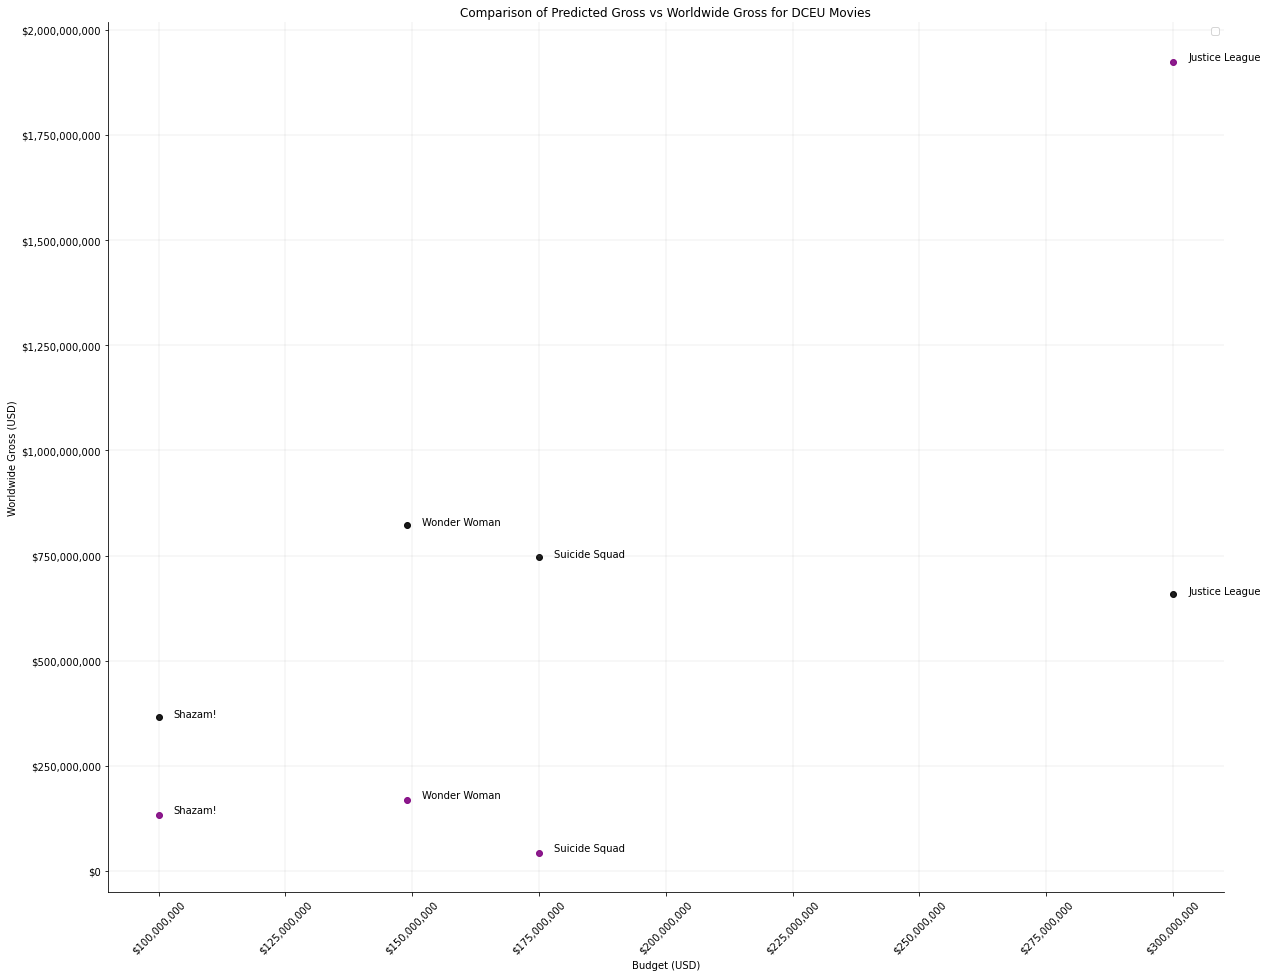

In [65]:
import matplotlib.ticker as mtick
def scatterplot(df, x_dim, y_dim, z_dim):
 x= df[x_dim]
 y= df[y_dim]
 z= df[z_dim]
 
 fig, ax = plt.subplots(figsize=(20,16))
 
 #define color array
 colors = ['black', 'purple']
 
 #customize transparency for each dot in the scatter plot
 
 #plot each x-y
 ax.scatter(x, y, alpha=0.9, color=colors[0])
 ax.scatter(x, z, alpha=0.9, color=colors[1])
 
 #add title and axes labels
 ax.set_title('Comparison of Predicted Gross vs Worldwide Gross for DCEU Movies')
 ax.set_xlabel('Budget (USD)')
 ax.set_ylabel('Worldwide Gross (USD)')
 
 #remove top and right borders
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 
 #add major gridlines
 ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
 
 #Change y-axis label style and include Currency format
 ax.ticklabel_format(style='plain', useOffset=False, axis='y')
 fmt = '${x:,.0f}'
 tick = mtick.StrMethodFormatter(fmt)
 ax.yaxis.set_major_formatter(tick)
 
 
 #Change x-axis label style and include Currency format
 ax.ticklabel_format(style='plain', useOffset=False, axis='x')
 fmt = '${x:,.0f}'
 tick = mtick.StrMethodFormatter(fmt)
 ax.xaxis.set_major_formatter(tick)
 plt.xticks(rotation=45)
 
 
 
 #add Legend
 ax.legend()
 
 
 
 for i in test_data.index: 
    plt.text(test_data['Budget'][i]+3000000.0, test_data['Projected Gross'][i]+3000000.0, i)
    plt.text(test_data['Budget'][i]+3000000.0, test_data['Worldwide Gross'][i], i)
 
 plt.show()
 
scatterplot(test_data, 'Budget', 'Worldwide Gross', 'Projected Gross')

dc_vars = train_data[[‘Budget’, ‘Number of Theaters’, ‘Number of Weeks’]]


In [9]:
dc_profit = pd.read_csv('Resources/DCEU_Profits.csv')
dc_profit

,Movie,Global Opening,Worldwide Gross,Domestic Gross,International Gross,Superman,Batman,Wonder Woman,Deadshot,Harley Quinn,Aquaman,Flash,Cyborg,Shazam,Joker,Lex Luthor,Number of Theaters,Number of Weeks,Budget
0,Man of Steel,226478579,668045518,291045518,377000000,1,0,0,0,0,0,0,0,0,0,0,4207,28,225000000
1,Batman v Superman: Dawn of Justice,356076879,873634919,330360194,543274725,1,1,1,0,0,1,1,1,0,0,1,4256,40,250000000
2,Suicide Squad,244258106,746846894,325100054,421746840,0,1,0,1,1,0,0,0,0,1,0,4255,22,175000000
3,Wonder Woman,230260677,821847012,412563408,409283604,0,1,1,0,0,0,0,0,0,0,0,4165,31,149000000
4,Justice League,734141594,657924295,229024295,428900000,1,1,1,0,0,1,1,1,0,0,1,4051,58,300000000
5,Aquaman,249387590,1148485886,335061807,813424079,0,0,0,0,0,1,0,0,0,0,0,4184,53,160000000
6,Shazam!,128859190,365971656,140371656,225600000,1,0,0,0,0,0,0,0,1,0,1,4306,38,100000000
7,Birds of Prey,56994063,201858461,84158461,117700000,0,0,0,0,1,0,0,0,0,0,0,4236,47,84500000
8,Wonder Woman 1984,56583702,166534027,46534027,120000000,0,0,1,0,0,0,0,0,0,0,0,2218,32,200000000


In [49]:
X = dc_films[["International Gross", "Global Opening"]].values.reshape(-1, 2)
y = dc_films["Domestic Gross"].values.reshape(-1, 1)

In [50]:
print("Shape: ", X.shape, y.shape)

Shape:  (9, 2) (9, 1)


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.933765119459035
Testing Score: -6.163829712626317


Text(0.5, 1.0, 'Domestic Gross: Actual Vs. Predicted')

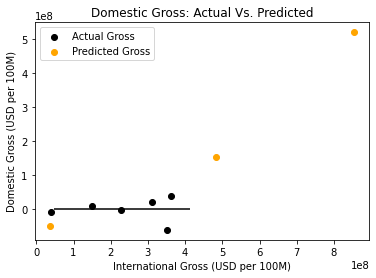

In [59]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="black", label="Actual Gross")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Predicted Gross")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.xlabel('International Gross (USD per 100M)')
plt.ylabel('Domestic Gross (USD per 100M)')
plt.title("Domestic Gross: Actual Vs. Predicted")

Text(0, 0.5, 'Opening Profit')

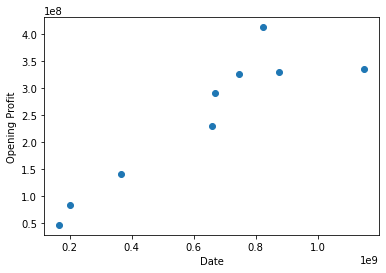

In [12]:
plt.scatter(X, y)
plt.xlabel("Date")
plt.ylabel("Opening Profit")